In [1]:
input_file = '../graph/bitcoin-sorted.edgelist'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import graphviz as gv

mpl.rcParams['figure.figsize'] = [18.5, 10.5]

In [3]:
df = pd.read_csv(input_file, sep=' ', header=0)
df.columns = ['X', 'Y']
df
num_samples = df['X'].size

In [4]:
# Group the elements by count
counts = df.groupby('X').count()
counts.size

4814

In [5]:
np.mean(counts)

Y    7.39302
dtype: float64

In [6]:
np.median(counts)

2.0

Plot distribution of node degrees (number of neighbors per node)

,Count
Id,
1,214
2,45
4,63
5,3
6,39
7,232
8,1
9,1
10,8


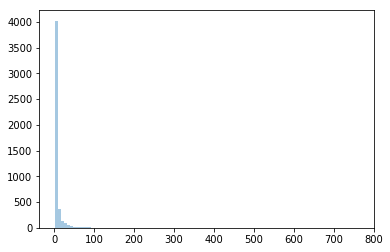

In [7]:
sns.distplot(counts, kde=False, bins=100)
counts.index.rename('Id', inplace=True)
counts.columns = ['Count']
counts

In [8]:
percentiles = pd.DataFrame(counts.loc[:, 'Count'] / num_samples)

In [9]:
cumsum = percentiles.cumsum()

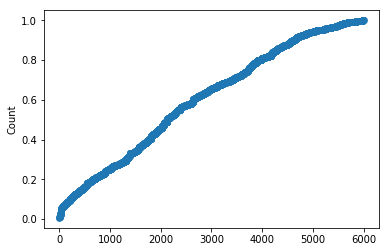

In [10]:
sns.regplot(cumsum.index.values, cumsum['Count'], fit_reg=False)

In [11]:
# Define available embeddings
emb_filenames = [
             '../emb/bitcoin-2dims-10walks.emb',
             '../emb/bitcoin-2dims-20walks.emb',
             '../emb/bitcoin-2dims-40walks.emb',
             '../emb/bitcoin-2dims-60walks.emb']

# Load embeddings
embeddings = []
for filename in emb_filenames:
    embedding = pd.read_csv(filename, sep=' ')
    embedding.index.rename('Id', inplace=True)
    embedding.columns = ['X', 'Y']
    embeddings.append(embedding)

In [12]:
# Rename and join

counts
dfs_joined = []
for df in embeddings:
    df_joined = df.join(counts)
    df_joined['Count'].fillna(0, inplace=True)
    df_joined.sort_values(by=['Count'], inplace=True)
    dfs_joined.append(df_joined)

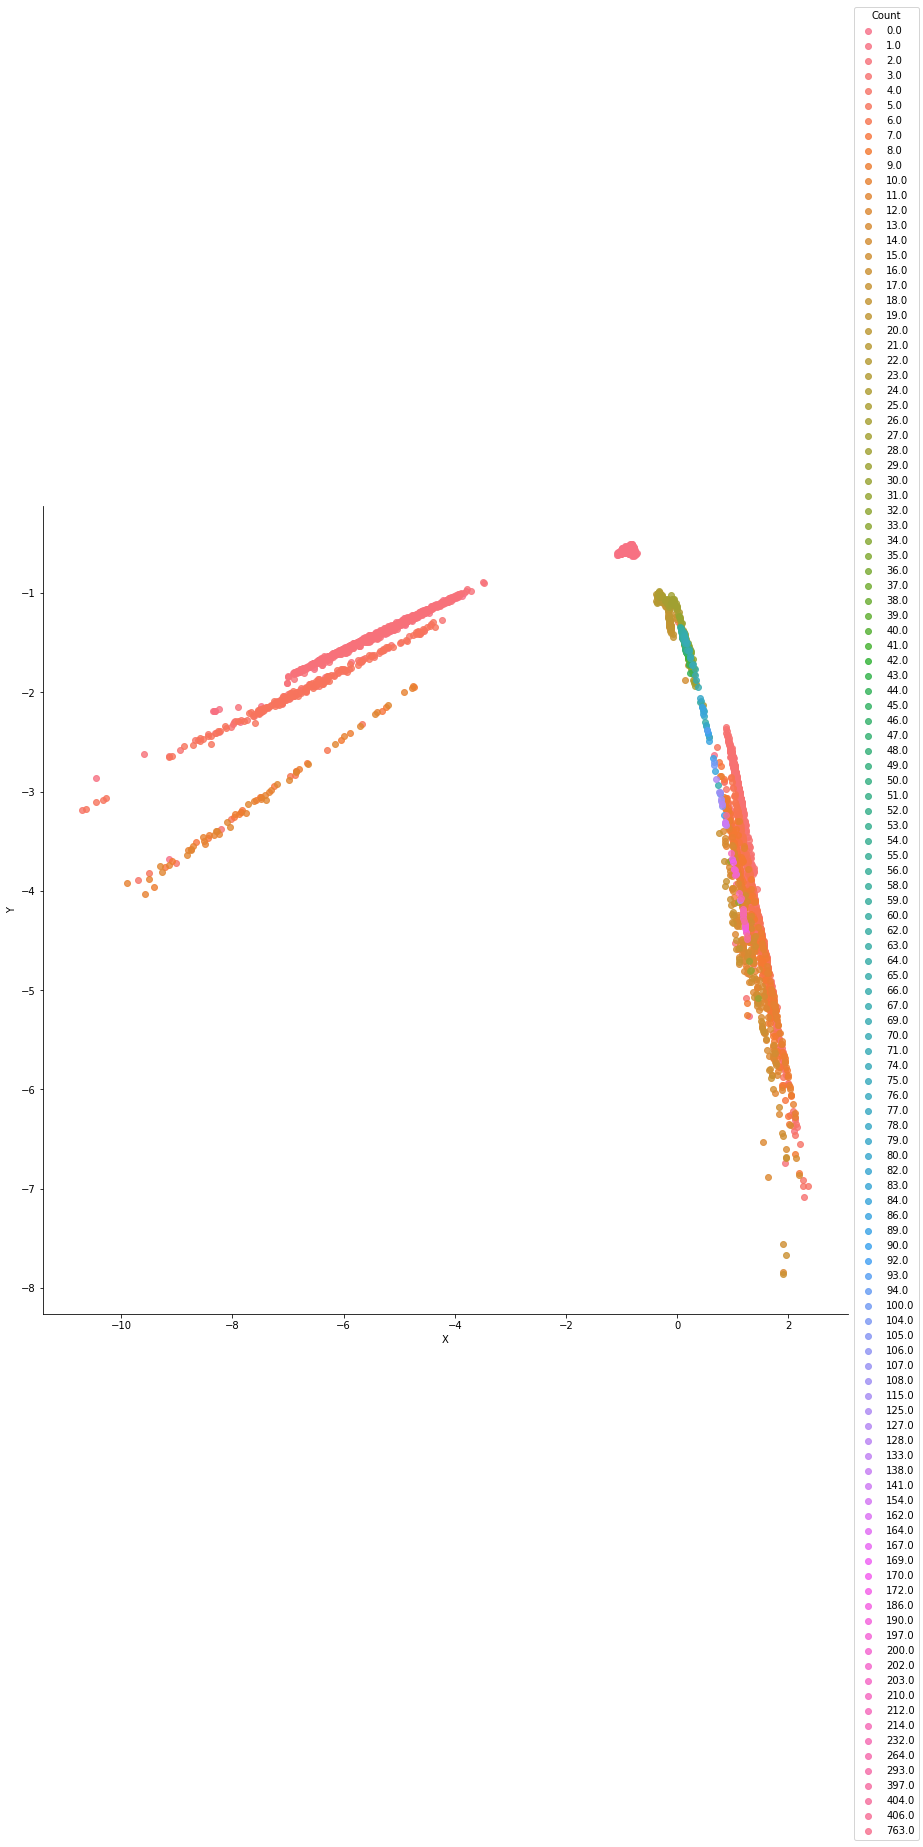

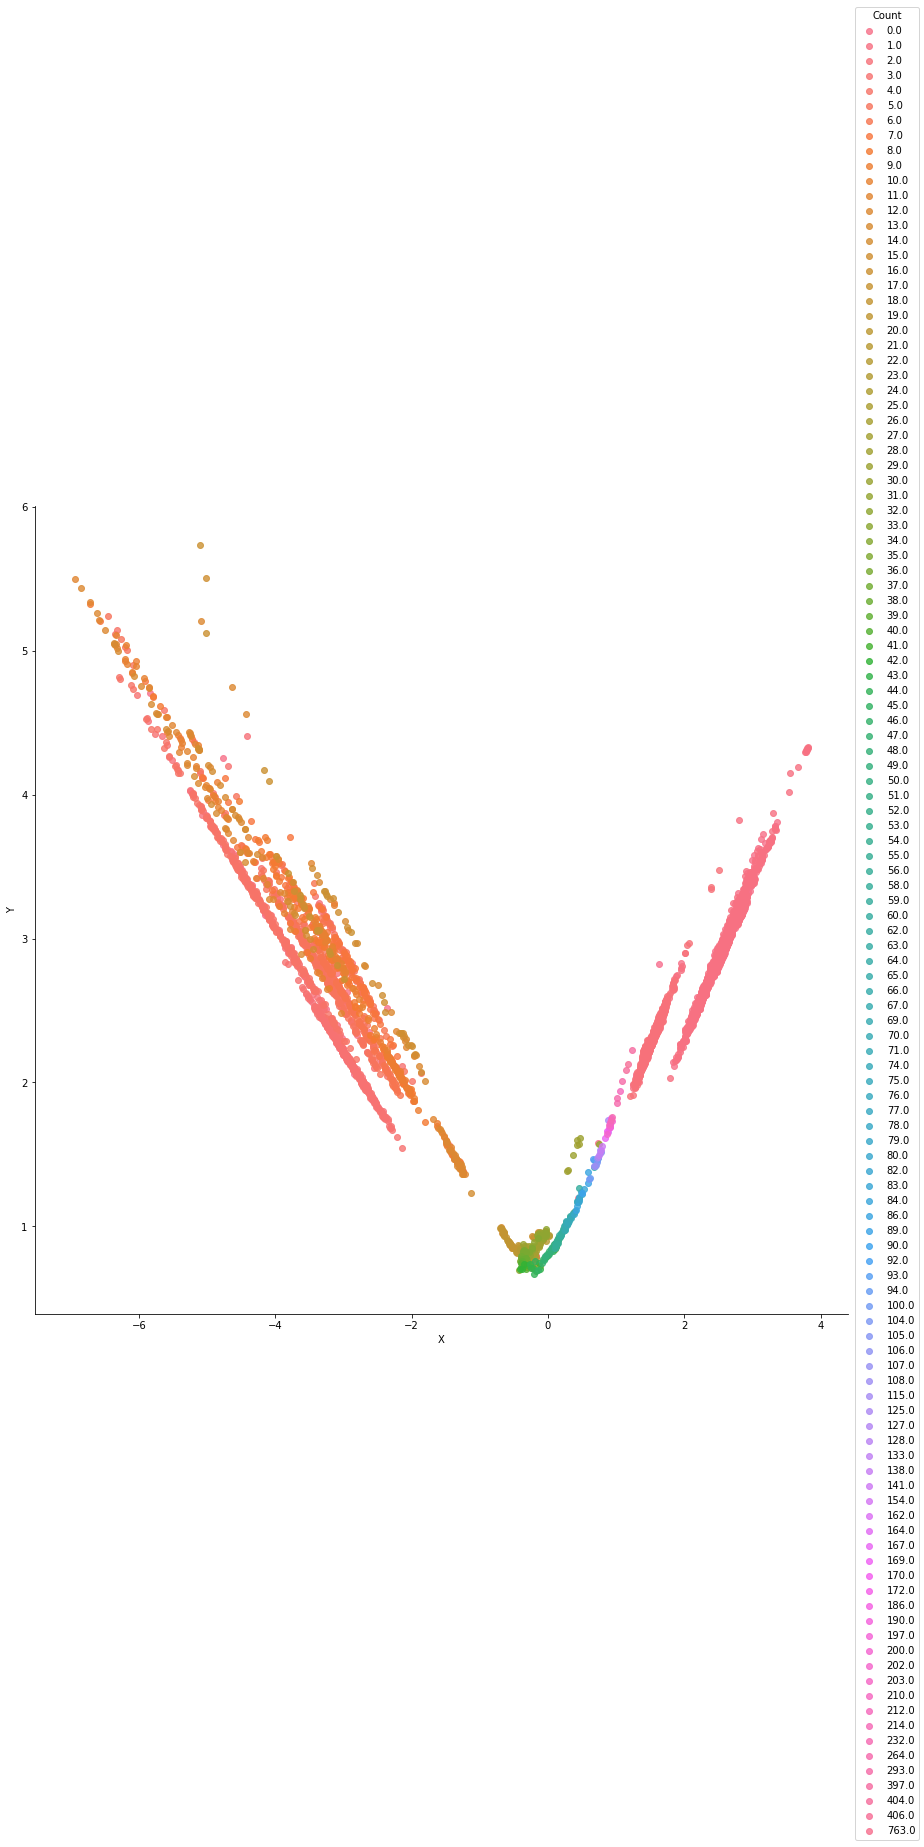

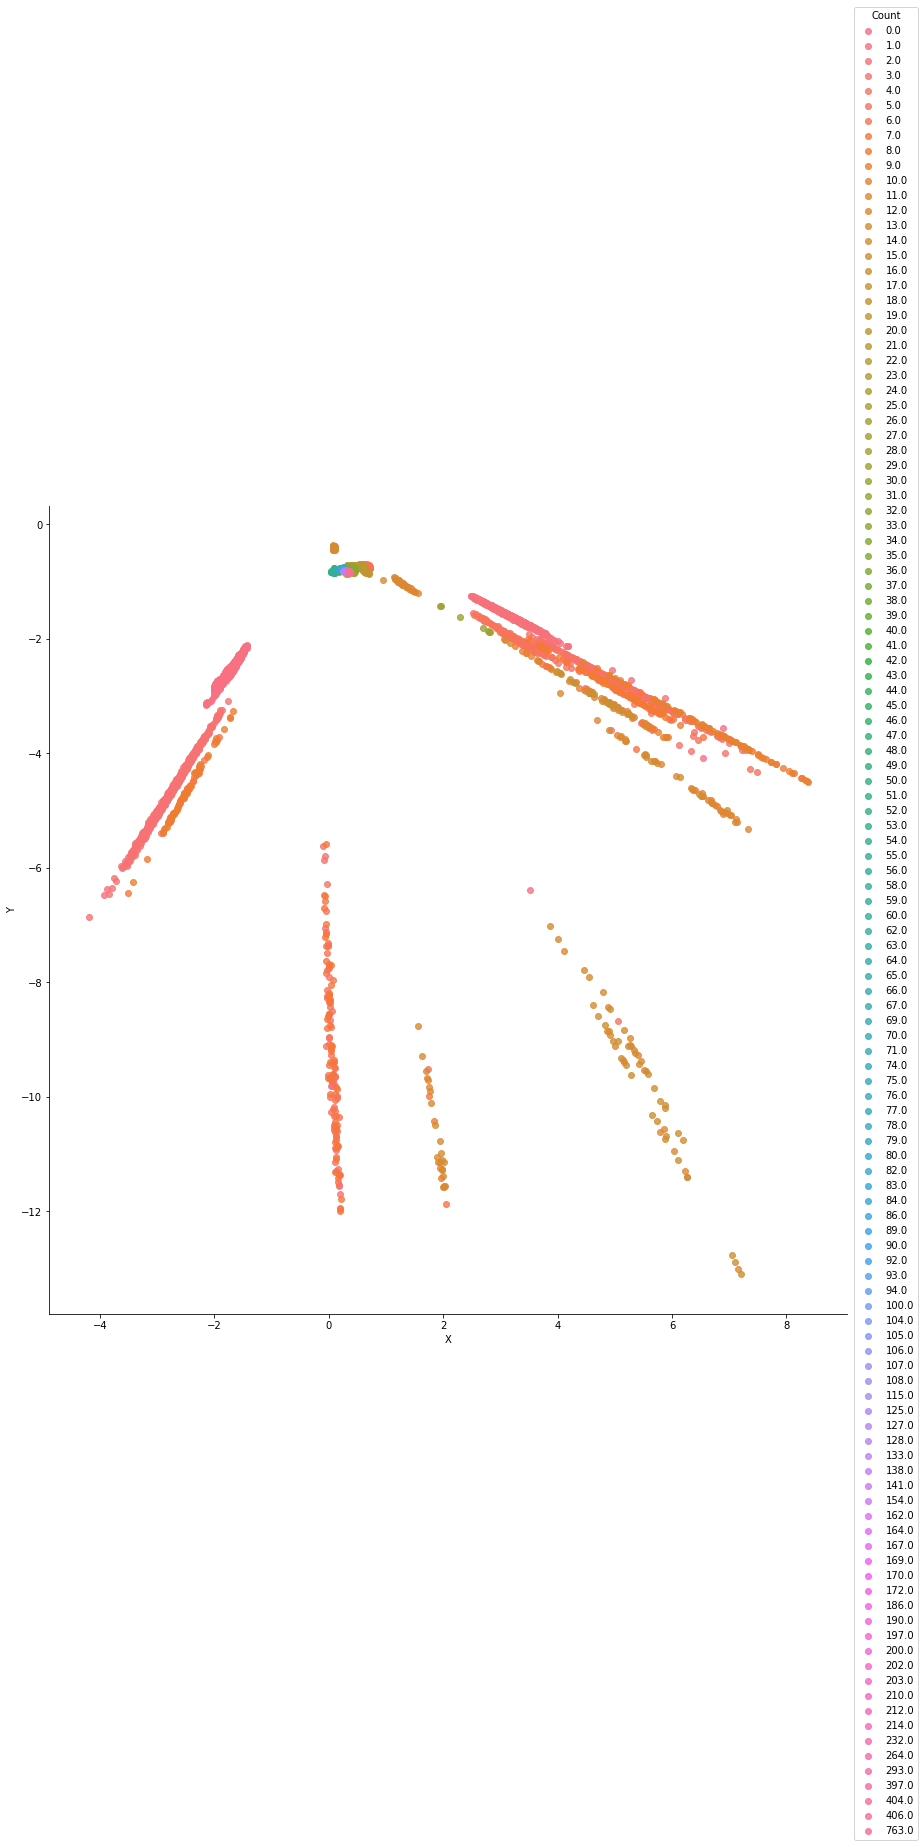

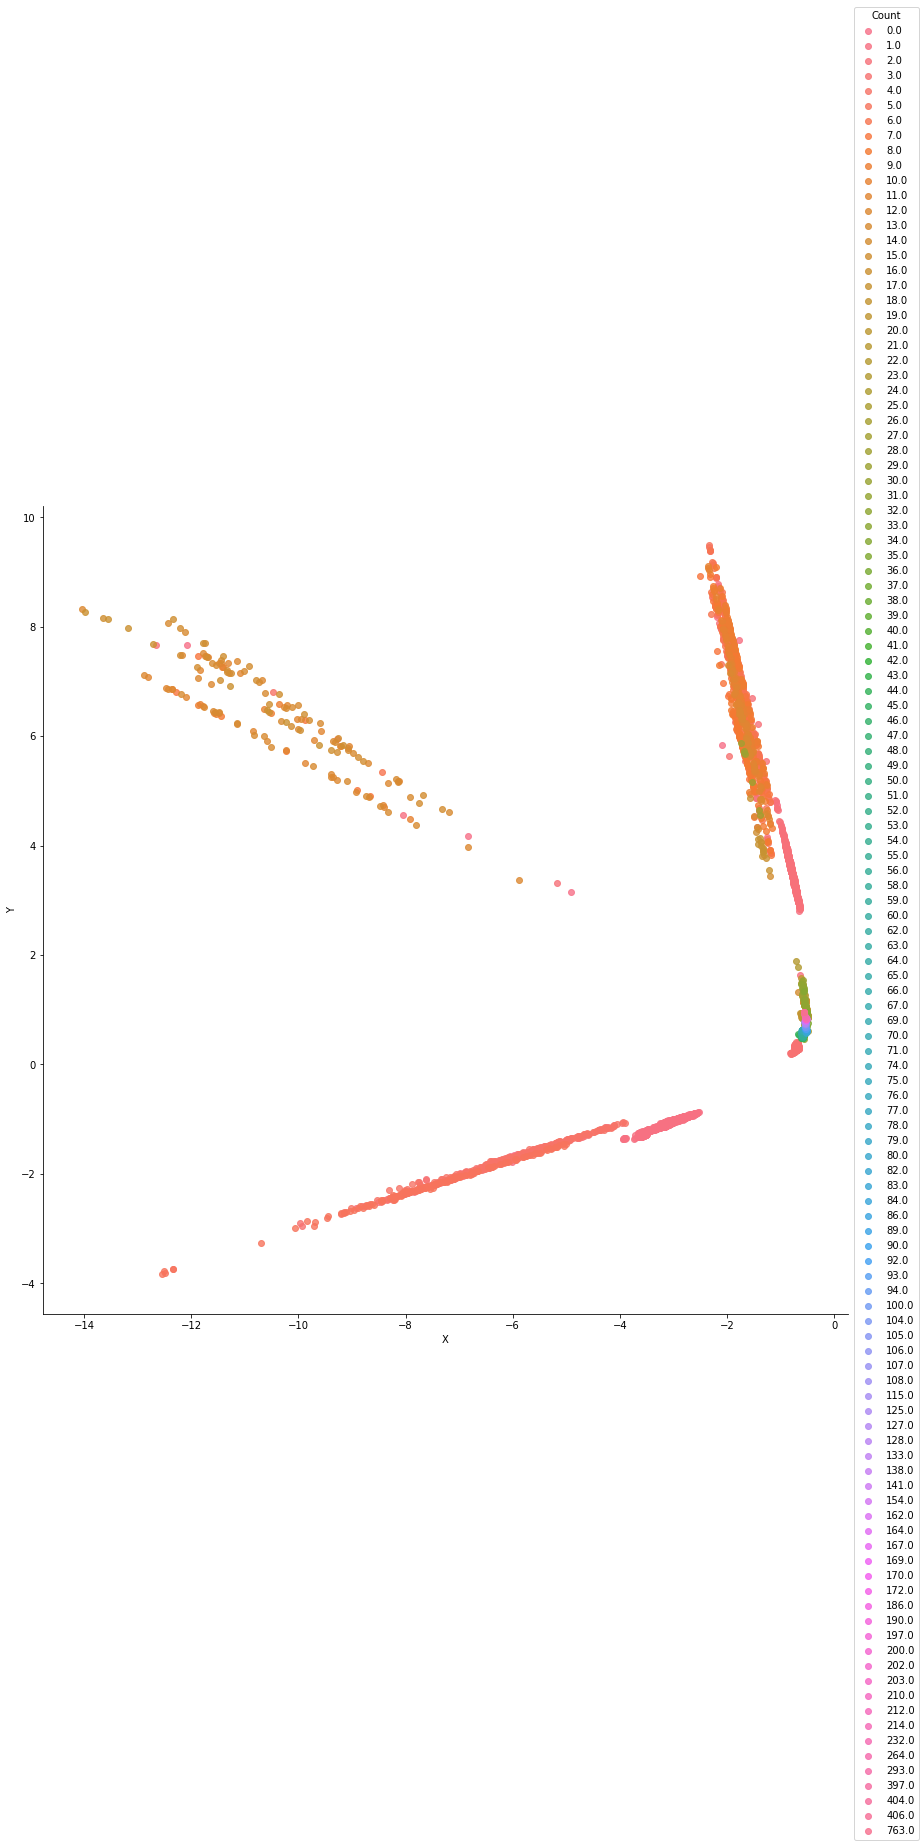

In [13]:
# Check out the in- out- degrees DO THIS FIRST
# Attempt T-SNE, with strength of connections and without!
# Check out weighted random walks
# Sum-weights 
# Choose coloring scheme that does not wrwap around
# Variational auto-encoder
for df in dfs_joined:
    sns.lmplot(data=df, x='X', y='Y', hue='Count', fit_reg=False, size=12, aspect=1)
#    axes = lm.axes
#    axes[0,0].set_xlim(-12, 0)
#    axes[0,0].set_ylim(-9, 4)
